# Task 7 : Heart Disease Prediction

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [8]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

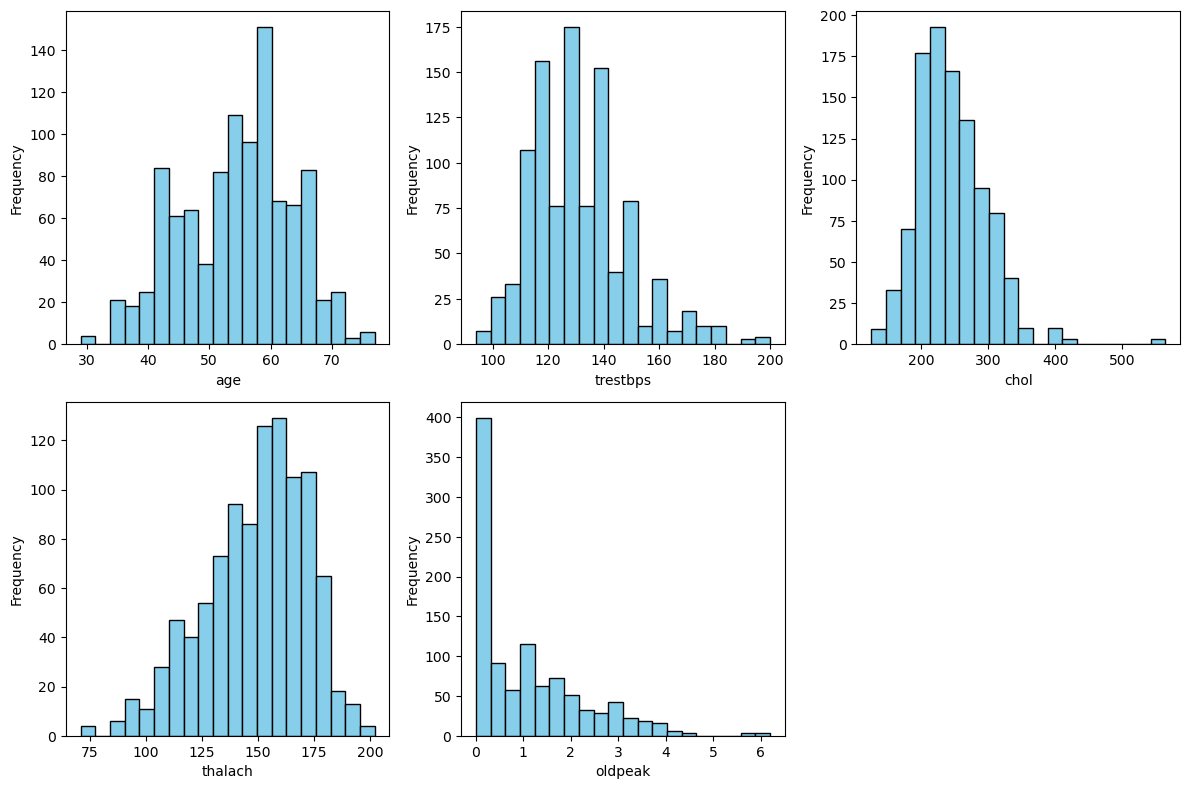

In [9]:
import matplotlib.pyplot as plt

# Select numerical columns for the histogram
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Plot histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


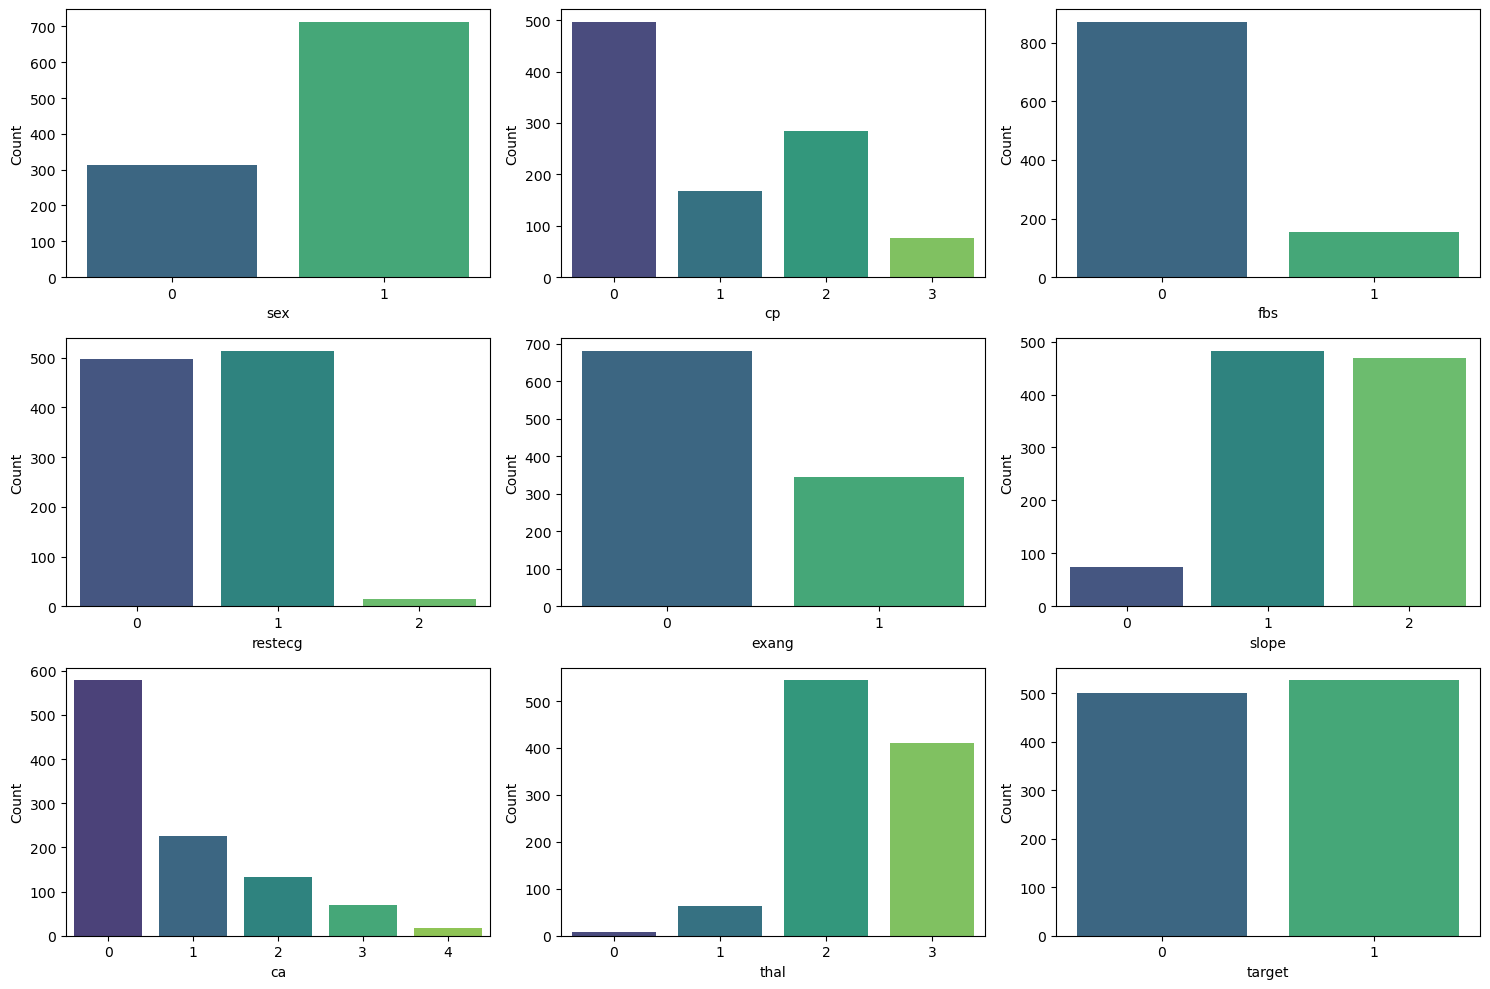

In [10]:
import seaborn as sns

# Select categorical columns for the countplot
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Plot countplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


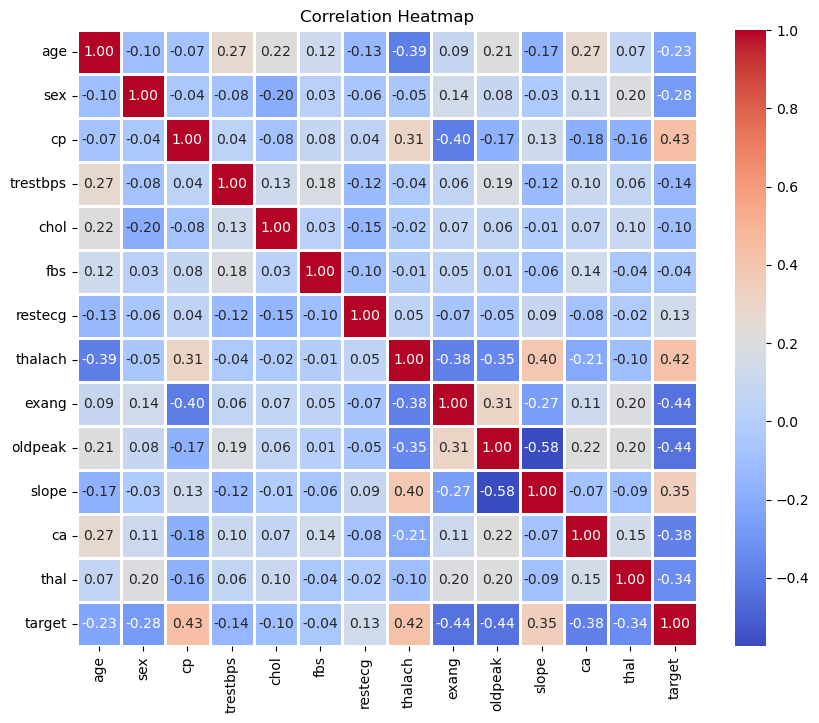

In [11]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()


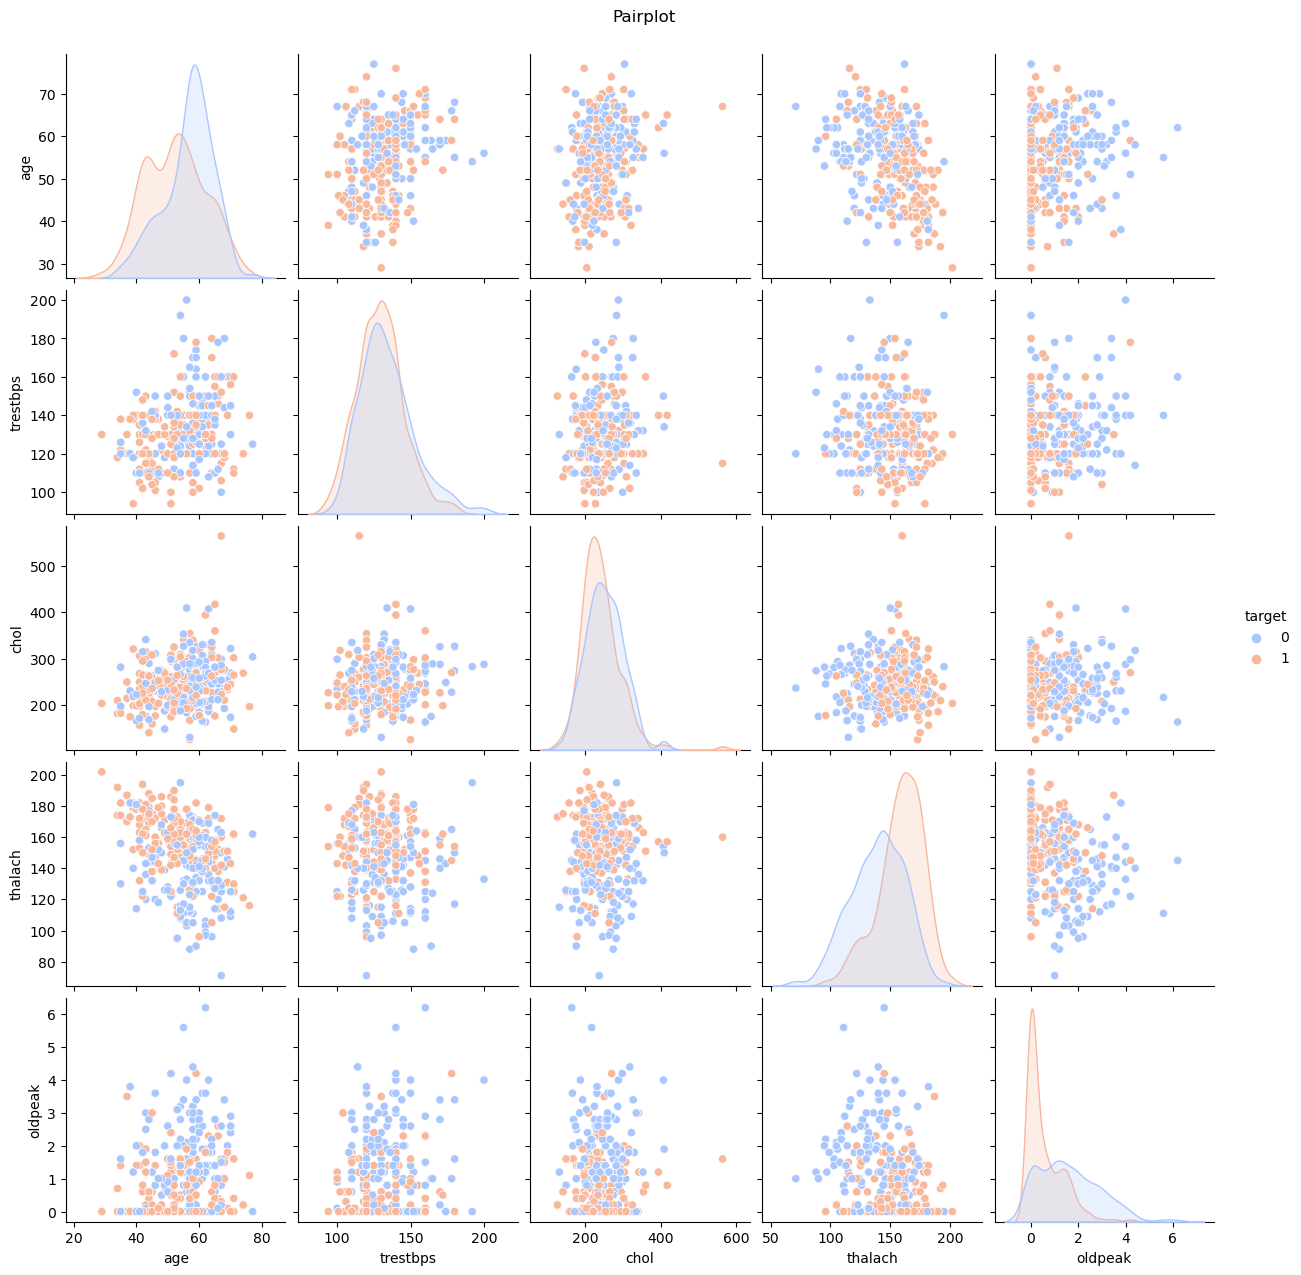

In [12]:
# Select columns for the pairplot
pairplot_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']

# Plot the pairplot
sns.pairplot(df[pairplot_cols], hue='target', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pairplot', y=1.02)
plt.show()


# Modelling

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Assuming you have already loaded and preprocessed your data into the 'df' dataframe

# Separate features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(probability=True),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    XGBClassifier(),
    LGBMClassifier()
]

# Dictionary to store model performance metrics
model_performance = {}

# Train and evaluate each model
for model in models:
    model_name = model.__class__.__name__
    # print(f"\nTraining {model_name}...")
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for AUC-ROC curve

    # Calculate performance metrics
    auc_roc = roc_auc_score(y_test, y_prob)
    model_report = classification_report(y_test, y_pred, output_dict=True)
    model_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Store performance metrics in the dictionary
    model_performance[model_name] = {
        'AUC-ROC': auc_roc,
        'Precision': model_report['1']['precision'],
        'Recall': model_report['1']['recall'],
        'F1-score': model_report['1']['f1-score'],
        'Support': model_report['1']['support'],
        'Confusion Matrix': model_confusion_matrix
    }

    # print(f"\n{model_name} Classification Report:")
    # print(classification_report(y_test, y_pred))

    # print(f"\n{model_name} Confusion Matrix:")
    # print(model_confusion_matrix)

    # print("=" * 100)


# Model's Performances

In [14]:
# Convert the model_performance dictionary to a DataFrame
model_performance_df = pd.DataFrame.from_dict(model_performance, orient='index')

# Display the model performance metrics DataFrame
print("\nModel Performance Metrics:")
model_performance_df


Model Performance Metrics:


,AUC-ROC,Precision,Recall,F1-score,Support,Confusion Matrix
LogisticRegression,0.878736,0.756303,0.873786,0.810811,103,"[[73, 29], [13, 90]]"
KNeighborsClassifier,0.948553,0.800000,0.893204,0.844037,103,"[[79, 23], [11, 92]]"
DecisionTreeClassifier,0.985437,1.000000,0.970874,0.985222,103,"[[102, 0], [3, 100]]"
RandomForestClassifier,0.999001,1.000000,0.970874,0.985222,103,"[[102, 0], [3, 100]]"
GradientBoostingClassifier,0.980678,0.915888,0.951456,0.933333,103,"[[93, 9], [5, 98]]"
SVC,0.963164,0.850877,0.941748,0.894009,103,"[[85, 17], [6, 97]]"
GaussianNB,0.870550,0.754098,0.893204,0.817778,103,"[[72, 30], [11, 92]]"
LinearDiscriminantAnalysis,0.881020,0.761905,0.932039,0.838428,103,"[[72, 30], [7, 96]]"
XGBClassifier,0.988864,1.000000,0.970874,0.985222,103,"[[102, 0], [3, 100]]"
LGBMClassifier,1.000000,1.000000,0.970874,0.985222,103,"[[102, 0], [3, 100]]"


# AUC - ROC - Interactive Plot

In [15]:
import plotly.graph_objects as go
from sklearn.metrics import roc_auc_score, roc_curve

roc_data = []

for model in models:
    model_name = model.__class__.__name__
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    auc_roc = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_data.append((model_name, fpr, tpr, auc_roc))

fig = go.Figure()

for model_name, fpr, tpr, auc_roc in roc_data:
    fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f"{model_name} (AUC = {auc_roc:.2f})"))

fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line_dash='dash', name='Random'))
fig.update_layout(title='AUC-ROC Curves for Different Models',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate',
                  legend=dict(x=0.98, y=0.02, xanchor='right', yanchor='bottom'),
                  xaxis=dict(range=[0, 1]),
                  yaxis=dict(range=[0, 1]),
                  showlegend=True)

fig.show()
